In [34]:
from newsapi import NewsApiClient
import requests
from PIL import Image, ImageOps
from marxify import Marxify
import tweepy

In [18]:
# Prepare APIs

# NewsAPI
newsapi = NewsApiClient(api_key='bbba33d91ef64b5cafeea9be97da9538')
country = 'us' 

# Twitter API
# I have regenerated these so they won't work
consumer_key = 'ZIJyJlEMhgpzFE3zrPbqLFSnO'
consumer_secret = 'Xa1Vq8Ze5i7SAnj2EdAINnAZOJlVYmWekiAGPXEoXinhp5opE2'
access_token = '3264530906-hJ0arh1odGptrBosf5szy8F1O6BpxygzA91WNf0'
access_token_secret = 'VsmPmWdYZ3R20zkGKH0cgYcEufSlF7v07j1Wpj847y6ms'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

twitterApi = tweepy.API(auth)

# picture file name
pic_filename = 'pic.png'

In [44]:
# Get latest news and picture
headlines = newsapi.get_top_headlines(country=country)
articleJson = sorted([r for r in headlines['articles'] if r['content'] is not None], key=lambda r: r['content'])[3]
imageUrl = articleJson['urlToImage']
image = Image.open(requests.get(imageUrl, stream=True).raw).convert(mode='RGBA')
image = image.resize((800,450))

# overlay communist symbol
communistSymbol = Image.open('assets/hammer_sickle_and_star.png').resize((180,200))
image.alpha_composite(communistSymbol, (10,10))
image.save(pic_filename)

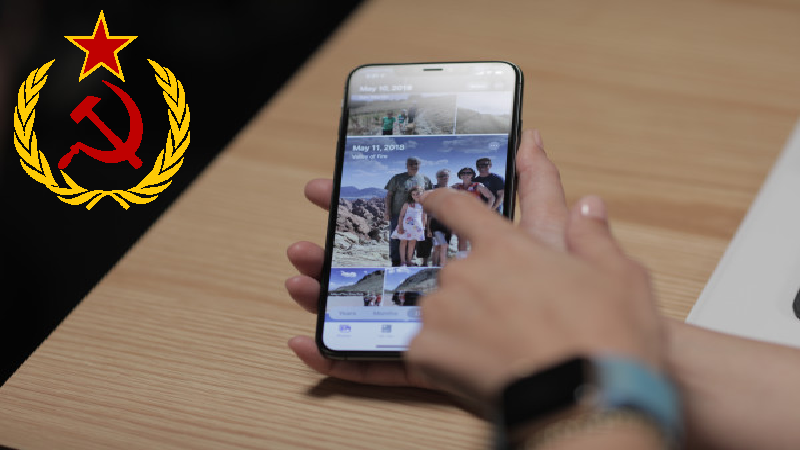

In [45]:
image

In [46]:
# train model
model = Marxify(articleJson['content'][:-15])

In [47]:
# get status text
status = model.makeCommunistSentence()
status += ' #%s #%s #%s #marxovchain' % (model._keywords[0], model._keywords[1], model._keywords[2])

In [48]:
status

'By changes in the case of ancient property, what you admit in the place of manufacture was taken by the new Mac Pro was #mac #unfold #keynote #marxovchain'

In [33]:
# upload to Twitter
twitterApi.update_with_media(status=status, filename=pic_filename)

Status(_api=<tweepy.api.API object at 0x0000020905D536D8>, _json={'created_at': 'Wed Jun 05 02:19:30 +0000 2019', 'id': 1136095169755795456, 'id_str': '1136095169755795456', 'text': 'In this grim forecast — which was endorsed by the manufacturing middle class; division of labour in each single wor… https://t.co/zt7VnLjaqX', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/zt7VnLjaqX', 'expanded_url': 'https://twitter.com/i/web/status/1136095169755795456', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="http://manna.orasphong.com" rel="nofollow">manna-test</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 3264530906, 'id_str': '3264530906', 'name': 'Oras Phong', 'screen_name': 'orasphong', 'location': '', 'description': '', 'url': None, 'entities': 